In [1]:
import cv2
from incremental_explainer.models.faster_rcnn import FasterRcnn
from incremental_explainer.models.yolo import Yolo
from incremental_explainer.models.rt_detr import RtDetr

from incremental_explainer.explainers.d_rise import DRise
import torchvision.transforms as transforms
import numpy as np

image_location = f"datasets/LaSOT/0/00000001.jpg"
print(f"Processing image: {image_location}")
model = FasterRcnn()
img = cv2.imread(image_location)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transform = transforms.Compose([
    transforms.ToTensor()
])
img_t = transform(img)
results = model.predict([img_t])
explainer = DRise(results, nummasks=100)
saliency = explainer.create_saliency_map(image_location, model)
results

Processing image: datasets/LaSOT/0/00000001.jpg


100%|██████████| 99/99 [00:00<00:00, 366.94it/s]


[DetectionRecord()]

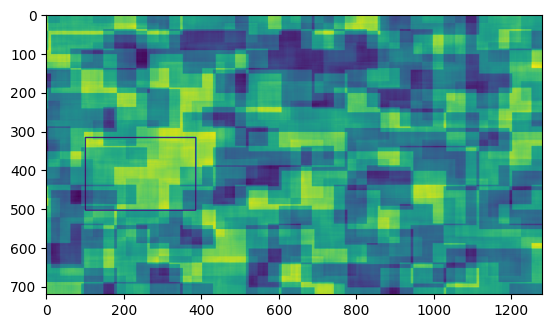

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

index = 0
class_index = np.argmax(results[0].class_scores[0].detach())
saliency_map = np.array(saliency[index]['detection']).transpose(1, 2, 0)[:,:,0]
bounding_box = np.array(results[0].bounding_boxes[index].cpu().detach())

plt.imshow(cv2.rectangle(saliency_map, (int(bounding_box[0]), int(bounding_box[1])), (int(bounding_box[2]), int(bounding_box[3])), (0, 255, 0), 2))



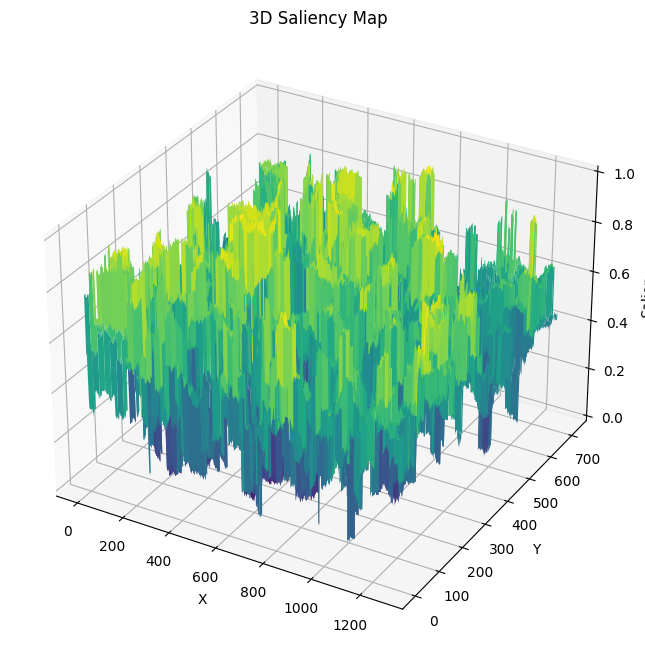

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate meshgrid for x and y coordinates
x, y = np.meshgrid(np.arange(saliency_map.shape[1]), np.arange(saliency_map.shape[0]))

# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D surface
ax.plot_surface(x, y, saliency_map, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Saliency')
plt.title('3D Saliency Map')

plt.show()

0.027172040334553445

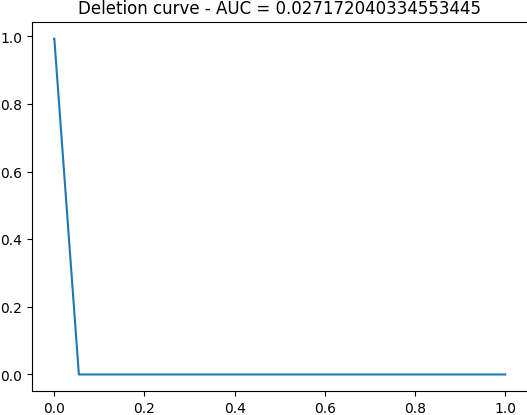

In [6]:
from incremental_explainer.metrics.deletion import compute_deletion

compute_deletion(model, saliency_map, img, class_index, bounding_box, divisions = 10, verbose=True)

0.25872853785297295

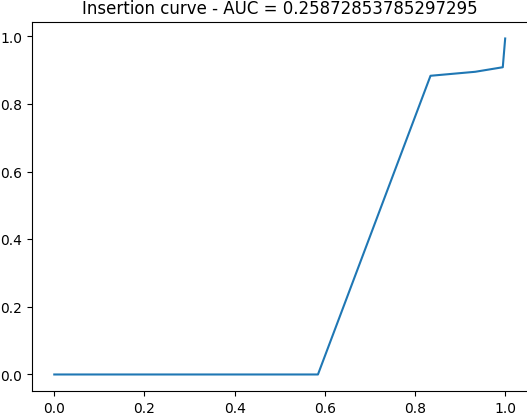

In [7]:
from incremental_explainer.metrics.insertion import compute_insertion


compute_insertion(model, saliency_map, img, class_index, bounding_box, divisions = 10, verbose=True)

0.07669098090904411

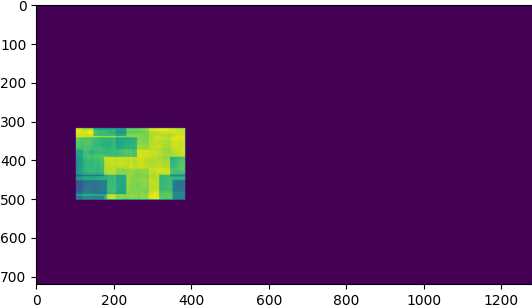

In [8]:
from incremental_explainer.metrics.epg import compute_energy_based_pointing_game

compute_energy_based_pointing_game(saliency_map, bounding_box, verbose=True)

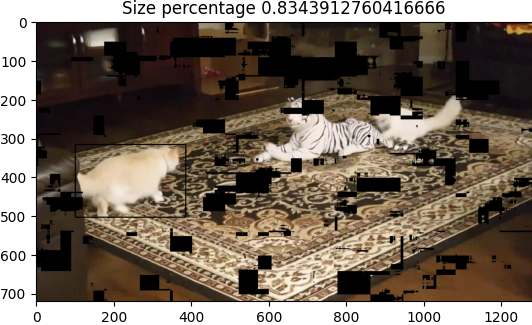

0.8343912760416666

In [9]:
from incremental_explainer.metrics.exp_size import compute_explanation_size

compute_explanation_size(model, saliency_map, img, class_index, bounding_box, divisions = 10, verbose=True)